In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [65]:
data = pd.read_csv("autos_mpg.csv")

In [66]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [67]:
data.shape

(398, 9)

In [68]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [69]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [71]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [72]:
# Drop the 'car_name' column (irrelevant column)
data = data.drop('car_name', axis=1)

# Convert 'horsepower' to numeric, coercing errors to NaN
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# Fill missing horsepower values with the median
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)

# Display the data types to confirm the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


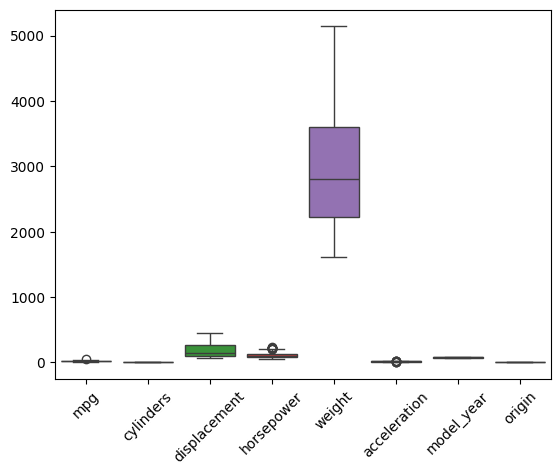

In [73]:
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

### Pairplot

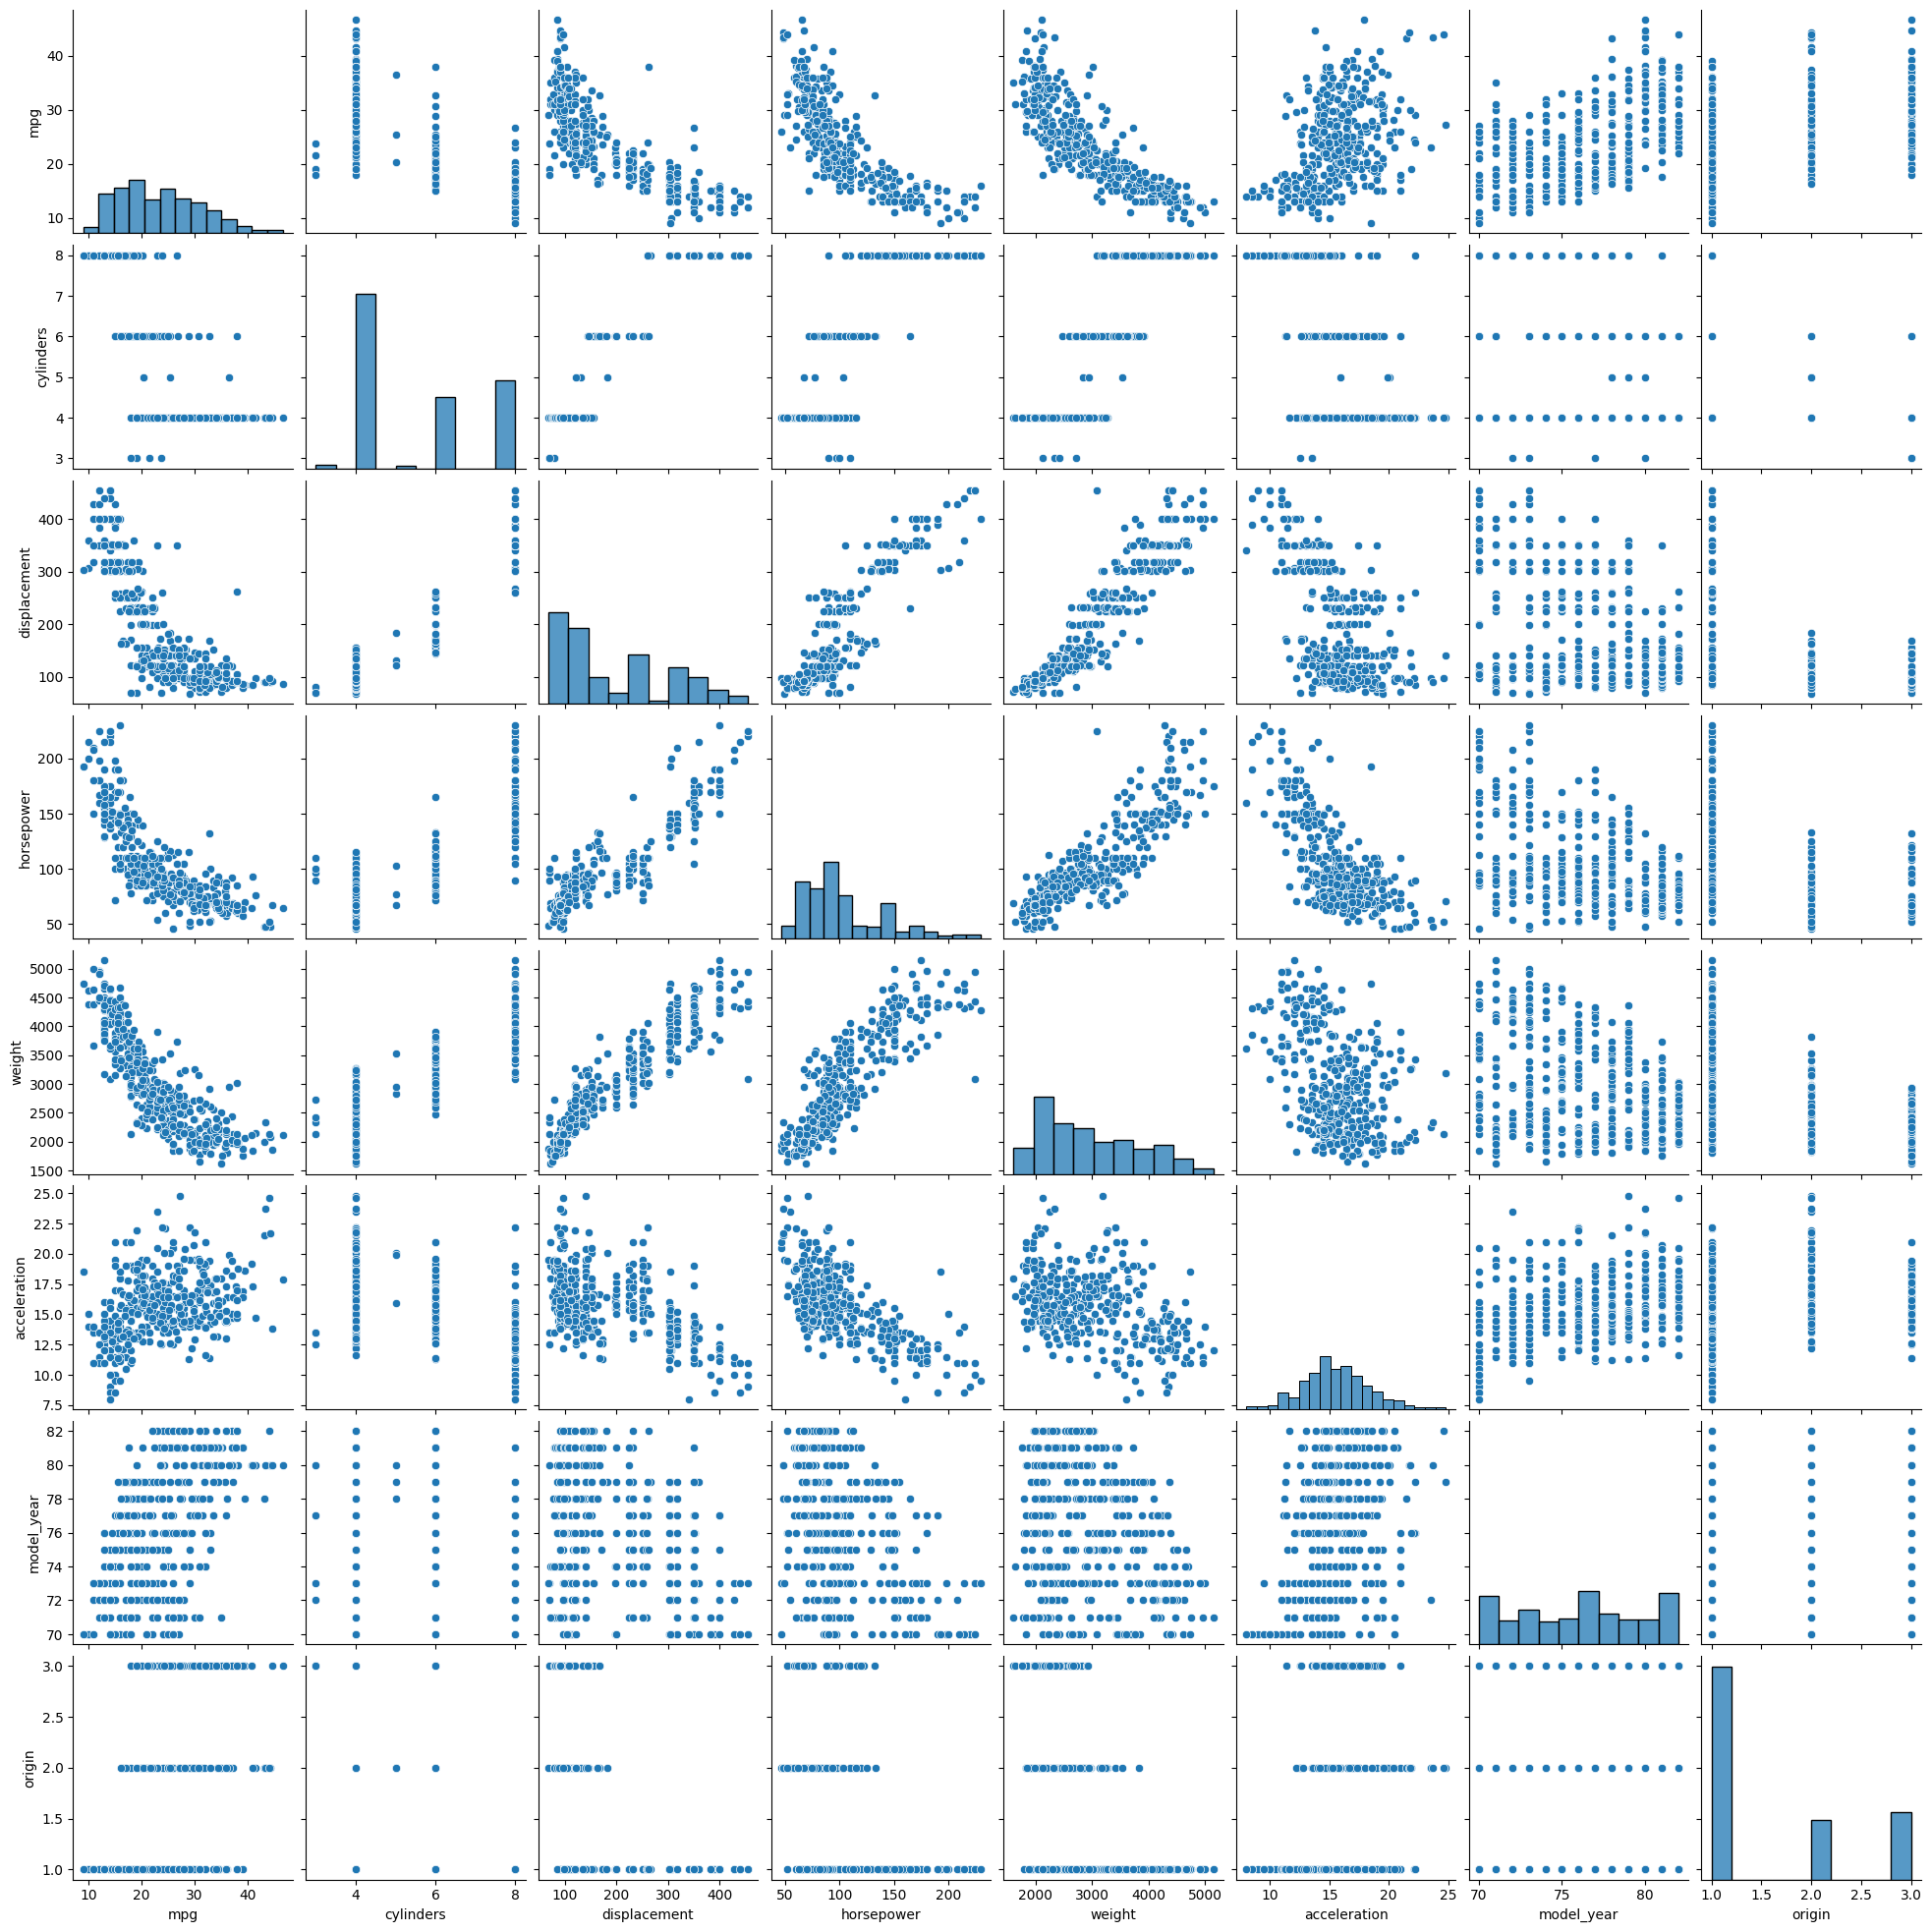

In [74]:
sns.pairplot(data)
plt.show()


### Heatmap Correlation

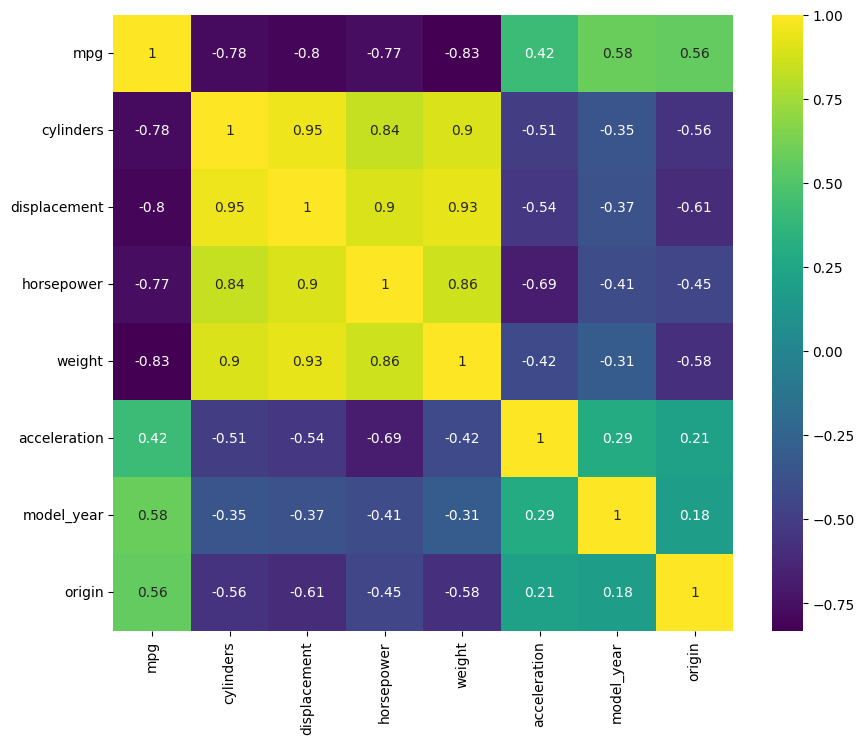

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='viridis')
plt.show()


### Box PLot

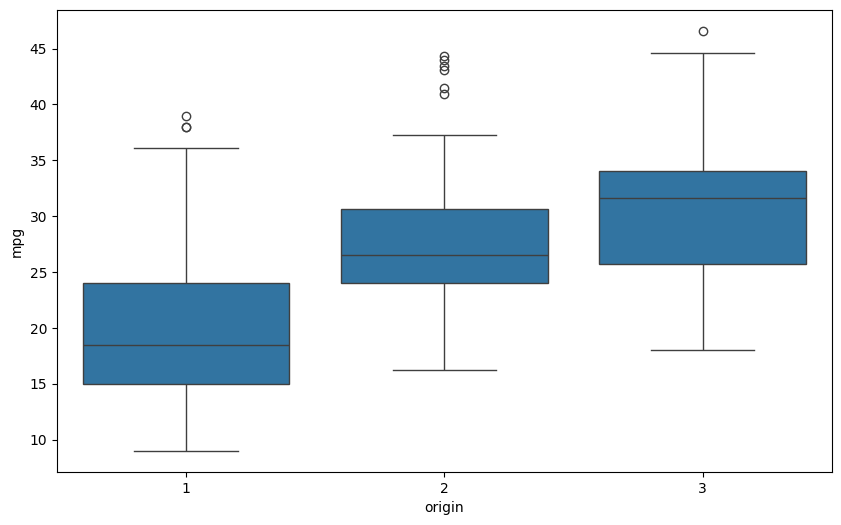

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=data)
plt.show()

## Train - Test split

In [77]:
X = data.drop('mpg', axis=1)
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Evaluation Metrics

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np

def evaluate_model(y_test, y_pred, model_name):
    
    # Calculate basic metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Mean Absolute Percentage Error
    mape_score = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # xplained Variance Score
    ev_score = explained_variance_score(y_test, y_pred)
    
    # Print results       MPG = Miles per gallon
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f} MPG")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f} MPG")
    print(f"R² Score: {r2:.4f} ({r2*100:.1f}% variance explained)")
    print(f"Mean Absolute Percentage Error (MAPE): {mape_score:.2f}%")
    print(f"Explained Variance Score: {ev_score:.4f}")
    
    # Return all metrics as a dictionary
    return {
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'mape': mape_score,
        'explained_variance': ev_score
    }


## ML Models

## 1 Linear Regression

In [79]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

y_pred_LR = model_LR.predict(X_test)

In [80]:
# Evaluation Report
results_LR = evaluate_model(y_test, y_pred_LR, "Linear Regression")


Linear Regression Performance:
Mean Absolute Error (MAE): 2.2554 MPG
Root Mean Squared Error (RMSE): 2.8632 MPG
R² Score: 0.8475 (84.8% variance explained)
Mean Absolute Percentage Error (MAPE): 11.44%
Explained Variance Score: 0.8477


## 2 Random Forest Regressor

In [81]:
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)

y_pred_RFR = model_RFR.predict(X_test)

In [82]:
# Evaluation Report
results_RFR = evaluate_model(y_test, y_pred_RFR, "Random Forest Regressor")


Random Forest Regressor Performance:
Mean Absolute Error (MAE): 1.5826 MPG
Root Mean Squared Error (RMSE): 2.1928 MPG
R² Score: 0.9106 (91.1% variance explained)
Mean Absolute Percentage Error (MAPE): 7.17%
Explained Variance Score: 0.9106


## 3 Support Vector Regressor

In [83]:
model_SVR = SVR()
model_SVR.fit(X_train, y_train)

y_pred_SVR = model_SVR.predict(X_test)

In [84]:
# Evaluation Report
results_SVR = evaluate_model(y_test, y_pred_SVR, "Support Vector Regressor")


Support Vector Regressor Performance:
Mean Absolute Error (MAE): 2.7910 MPG
Root Mean Squared Error (RMSE): 3.7061 MPG
R² Score: 0.7445 (74.5% variance explained)
Mean Absolute Percentage Error (MAPE): 12.01%
Explained Variance Score: 0.7446


## 4 Decision Tree regressor

In [85]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)

y_pred_DTR = model_DTR.predict(X_test)

In [86]:
# Evaluation Report
results_DTR = evaluate_model(y_test, y_pred_DTR, "Decision Tree Regressor")


Decision Tree Regressor Performance:
Mean Absolute Error (MAE): 2.3550 MPG
Root Mean Squared Error (RMSE): 3.4214 MPG
R² Score: 0.7823 (78.2% variance explained)
Mean Absolute Percentage Error (MAPE): 10.34%
Explained Variance Score: 0.7832


## 5 Gradient Boosting Regressor

In [87]:
model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, y_train)

y_pred_GBR = model_GBR.predict(X_test)

In [88]:
# Evaluation Report
results_GBR = evaluate_model(y_test, y_pred_GBR, "Gradient Boosting Regressor")


Gradient Boosting Regressor Performance:
Mean Absolute Error (MAE): 1.7828 MPG
Root Mean Squared Error (RMSE): 2.4015 MPG
R² Score: 0.8927 (89.3% variance explained)
Mean Absolute Percentage Error (MAPE): 8.18%
Explained Variance Score: 0.8937


## 6 XGB Regressor

In [89]:
model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)

y_pred_XGB = model_XGB.predict(X_test)

In [90]:
# Evaluation Report
results_XGB = evaluate_model(y_test, y_pred_XGB, "XGB Regressor")


XGB Regressor Performance:
Mean Absolute Error (MAE): 1.8426 MPG
Root Mean Squared Error (RMSE): 2.5775 MPG
R² Score: 0.8764 (87.6% variance explained)
Mean Absolute Percentage Error (MAPE): 7.91%
Explained Variance Score: 0.8772


## 7 LGBM Regressor (Light Gradient Boosting Machine)

In [91]:
model_LGBR = LGBMRegressor()
model_LGBR.fit(X_train, y_train)

y_pred_LGBR = model_LGBR.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 318, number of used features: 7
[LightGBM] [Info] Start training from score 23.608176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [92]:
# Evaluation Report
results_LGBR = evaluate_model(y_test, y_pred_LGBR, "Light Gradient Boosting Machine Regressor")


Light Gradient Boosting Machine Regressor Performance:
Mean Absolute Error (MAE): 1.7301 MPG
Root Mean Squared Error (RMSE): 2.2706 MPG
R² Score: 0.9041 (90.4% variance explained)
Mean Absolute Percentage Error (MAPE): 7.79%
Explained Variance Score: 0.9047


## Model Comparison

In [93]:
## Comprehensive Model Comparison

# Collect all results in a dictionary
all_results = {
    'Linear Regression': results_LR,
    'Random Forest Regressor': results_RFR,
    'Support Vector Regressor': results_SVR,
    'Decision Tree Regressor': results_DTR,
    'Gradient Boosting Regressor': results_GBR,
    'XGB Regressor': results_XGB,
    'Light Gradient Boosting Machine Regressor': results_LGBR
}

# Creating DataFrame for easy comparison
comparison_df = pd.DataFrame(all_results).T
comparison_df = comparison_df.round(4)

print("METRICS COMPARISON TABLE:")
print("=" * 80)
print(comparison_df.to_string())

METRICS COMPARISON TABLE:
                                              mae    rmse      r2     mape  explained_variance
Linear Regression                          2.2554  2.8632  0.8475  11.4408              0.8477
Random Forest Regressor                    1.5826  2.1928  0.9106   7.1723              0.9106
Support Vector Regressor                   2.7910  3.7061  0.7445  12.0052              0.7446
Decision Tree Regressor                    2.3550  3.4214  0.7823  10.3370              0.7832
Gradient Boosting Regressor                1.7828  2.4015  0.8927   8.1801              0.8937
XGB Regressor                              1.8426  2.5775  0.8764   7.9122              0.8772
Light Gradient Boosting Machine Regressor  1.7301  2.2706  0.9041   7.7918              0.9047


In [94]:
# Finding best model for each metric
print("BEST PERFORMING MODELS BY METRIC:")
print("=" * 50)
print(f"Best MAE (Lower is better): {comparison_df['mae'].idxmin()} - {comparison_df['mae'].min():.4f}")
print(f"Best RMSE (Lower is better): {comparison_df['rmse'].idxmin()} - {comparison_df['rmse'].min():.4f}")
print(f"Best R² Score (Higher is better): {comparison_df['r2'].idxmax()} - {comparison_df['r2'].max():.4f}")
print(f"Best MAPE (Lower is better): {comparison_df['mape'].idxmin()} - {comparison_df['mape'].min():.2f}%")
print(f"Best Explained Variance (Higher is better): {comparison_df['explained_variance'].idxmax()} - {comparison_df['explained_variance'].max():.4f}")


BEST PERFORMING MODELS BY METRIC:
Best MAE (Lower is better): Random Forest Regressor - 1.5826
Best RMSE (Lower is better): Random Forest Regressor - 2.1928
Best R² Score (Higher is better): Random Forest Regressor - 0.9106
Best MAPE (Lower is better): Random Forest Regressor - 7.17%
Best Explained Variance (Higher is better): Random Forest Regressor - 0.9106


In [95]:
# Overall ranking based on R² score
print(f"OVERALL RANKING (by R² Score):")
print("=" * 40)
ranking = comparison_df['r2'].sort_values(ascending=False)
for i, (model, score) in enumerate(ranking.items(), 1):
    print(f"{i}. {model}: {score:.4f} ({score*100:.1f}%)")


OVERALL RANKING (by R² Score):
1. Random Forest Regressor: 0.9106 (91.1%)
2. Light Gradient Boosting Machine Regressor: 0.9041 (90.4%)
3. Gradient Boosting Regressor: 0.8927 (89.3%)
4. XGB Regressor: 0.8764 (87.6%)
5. Linear Regression: 0.8475 (84.8%)
6. Decision Tree Regressor: 0.7823 (78.2%)
7. Support Vector Regressor: 0.7445 (74.5%)


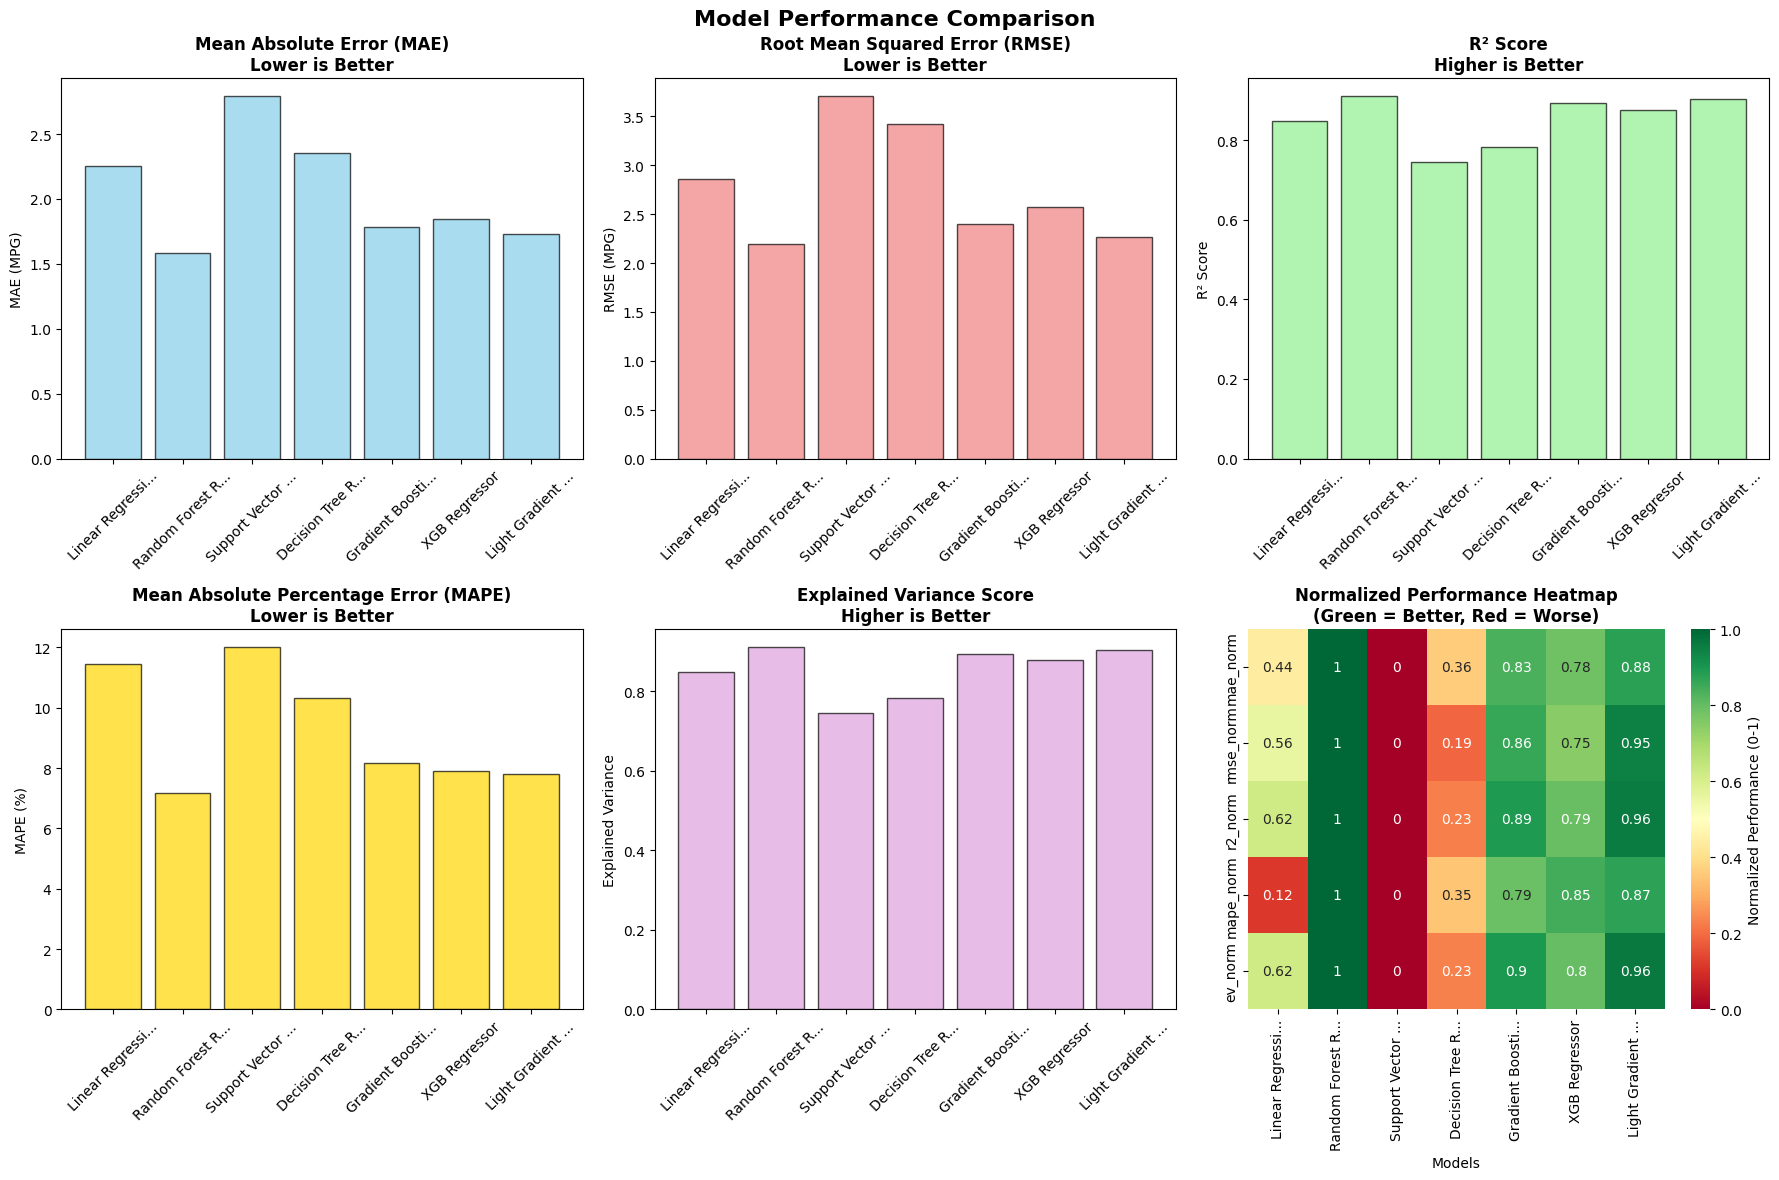

In [96]:
# Visualizations
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. MAE Comparison
axes[0, 0].bar(range(len(comparison_df)), comparison_df['mae'], 
               color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Mean Absolute Error (MAE)\nLower is Better', fontweight='bold')
axes[0, 0].set_ylabel('MAE (MPG)')
axes[0, 0].set_xticks(range(len(comparison_df)))
axes[0, 0].set_xticklabels([name[:15] + '...' if len(name) > 15 else name 
                           for name in comparison_df.index], rotation=45)

# 2. RMSE Comparison
axes[0, 1].bar(range(len(comparison_df)), comparison_df['rmse'], 
               color='lightcoral', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Root Mean Squared Error (RMSE)\nLower is Better', fontweight='bold')
axes[0, 1].set_ylabel('RMSE (MPG)')
axes[0, 1].set_xticks(range(len(comparison_df)))
axes[0, 1].set_xticklabels([name[:15] + '...' if len(name) > 15 else name 
                           for name in comparison_df.index], rotation=45)

# 3. R² Score Comparison
axes[0, 2].bar(range(len(comparison_df)), comparison_df['r2'], 
               color='lightgreen', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('R² Score\nHigher is Better', fontweight='bold')
axes[0, 2].set_ylabel('R² Score')
axes[0, 2].set_xticks(range(len(comparison_df)))
axes[0, 2].set_xticklabels([name[:15] + '...' if len(name) > 15 else name 
                           for name in comparison_df.index], rotation=45)

# 4. MAPE Comparison
axes[1, 0].bar(range(len(comparison_df)), comparison_df['mape'], 
               color='gold', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Mean Absolute Percentage Error (MAPE)\nLower is Better', fontweight='bold')
axes[1, 0].set_ylabel('MAPE (%)')
axes[1, 0].set_xticks(range(len(comparison_df)))
axes[1, 0].set_xticklabels([name[:15] + '...' if len(name) > 15 else name 
                           for name in comparison_df.index], rotation=45)

# 5. Explained Variance Comparison
axes[1, 1].bar(range(len(comparison_df)), comparison_df['explained_variance'], 
               color='plum', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Explained Variance Score\nHigher is Better', fontweight='bold')
axes[1, 1].set_ylabel('Explained Variance')
axes[1, 1].set_xticks(range(len(comparison_df)))
axes[1, 1].set_xticklabels([name[:15] + '...' if len(name) > 15 else name 
                           for name in comparison_df.index], rotation=45)


# 6. Combined Performance Heatmap
# Normalize metrics for better visualization (0-1 scale)
normalized_df = comparison_df.copy()
normalized_df['mae_norm'] = 1 - (comparison_df['mae'] - comparison_df['mae'].min()) / (comparison_df['mae'].max() - comparison_df['mae'].min())
normalized_df['rmse_norm'] = 1 - (comparison_df['rmse'] - comparison_df['rmse'].min()) / (comparison_df['rmse'].max() - comparison_df['rmse'].min())
normalized_df['mape_norm'] = 1 - (comparison_df['mape'] - comparison_df['mape'].min()) / (comparison_df['mape'].max() - comparison_df['mape'].min())
normalized_df['r2_norm'] = (comparison_df['r2'] - comparison_df['r2'].min()) / (comparison_df['r2'].max() - comparison_df['r2'].min())
normalized_df['ev_norm'] = (comparison_df['explained_variance'] - comparison_df['explained_variance'].min()) / (comparison_df['explained_variance'].max() - comparison_df['explained_variance'].min())

heatmap_data = normalized_df[['mae_norm', 'rmse_norm', 'r2_norm', 'mape_norm', 'ev_norm']].T
heatmap_data.columns = [name[:15] + '...' if len(name) > 15 else name for name in heatmap_data.columns]

sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=0.5, ax=axes[1, 2], 
            cbar_kws={'label': 'Normalized Performance (0-1)'})
axes[1, 2].set_title('Normalized Performance Heatmap\n(Green = Better, Red = Worse)', fontweight='bold')
axes[1, 2].set_xlabel('Models')

plt.tight_layout()
plt.show()


In [97]:

# Summary statistics
print(f"SUMMARY STATISTICS:")
print("=" * 30)
print(f"Average R² Score across all models: {comparison_df['r2'].mean():.4f}")
print(f"Standard deviation of R² Scores: {comparison_df['r2'].std():.4f}")
print(f"Range of R² Scores: {comparison_df['r2'].max() - comparison_df['r2'].min():.4f}")
print(f"Best performing model: {comparison_df['r2'].idxmax()}")
print(f"Worst performing model: {comparison_df['r2'].idxmin()}")

# Performance categories
print(f"PERFORMANCE CATEGORIES:")
print("=" * 35)
excellent_models = comparison_df[comparison_df['r2'] >= 0.85]
good_models = comparison_df[(comparison_df['r2'] >= 0.75) & (comparison_df['r2'] < 0.85)]
fair_models = comparison_df[(comparison_df['r2'] >= 0.65) & (comparison_df['r2'] < 0.75)]
poor_models = comparison_df[comparison_df['r2'] < 0.65]

print(f"Excellent Performance (R² ≥ 0.85): {len(excellent_models)} models")
for model in excellent_models.index:
    print(f"  - {model}: {excellent_models.loc[model, 'r2']:.4f}")

print(f"\nGood Performance (0.75 ≤ R² < 0.85): {len(good_models)} models")
for model in good_models.index:
    print(f"  - {model}: {good_models.loc[model, 'r2']:.4f}")

print(f"\nFair Performance (0.65 ≤ R² < 0.75): {len(fair_models)} models")
for model in fair_models.index:
    print(f"  - {model}: {fair_models.loc[model, 'r2']:.4f}")

if len(poor_models) > 0:
    print(f"\nPoor Performance (R² < 0.65): {len(poor_models)} models")
    for model in poor_models.index:
        print(f"  - {model}: {poor_models.loc[model, 'r2']:.4f}")


SUMMARY STATISTICS:
Average R² Score across all models: 0.8512
Standard deviation of R² Scores: 0.0643
Range of R² Scores: 0.1661
Best performing model: Random Forest Regressor
Worst performing model: Support Vector Regressor
PERFORMANCE CATEGORIES:
Excellent Performance (R² ≥ 0.85): 4 models
  - Random Forest Regressor: 0.9106
  - Gradient Boosting Regressor: 0.8927
  - XGB Regressor: 0.8764
  - Light Gradient Boosting Machine Regressor: 0.9041

Good Performance (0.75 ≤ R² < 0.85): 2 models
  - Linear Regression: 0.8475
  - Decision Tree Regressor: 0.7823

Fair Performance (0.65 ≤ R² < 0.75): 1 models
  - Support Vector Regressor: 0.7445


## Recommendation

In [98]:
print(f"RECOMMENDATION:")
print("=" * 20)
best_model = comparison_df['r2'].idxmax()
best_score = comparison_df['r2'].max()
print(f"Based on the comprehensive analysis, the {best_model} is recommended")
print(f"as the best model with an R² score of {best_score:.4f} ({best_score*100:.1f}% variance explained).")
print(f"This model provides the best balance of accuracy and reliability for fuel efficiency prediction.")

RECOMMENDATION:
Based on the comprehensive analysis, the Random Forest Regressor is recommended
as the best model with an R² score of 0.9106 (91.1% variance explained).
This model provides the best balance of accuracy and reliability for fuel efficiency prediction.


In [102]:
# Feature Importance Analysis for Fuel Efficiency Prediction Models
from sklearn.inspection import permutation_importance

print("=== FEATURE IMPORTANCE ANALYSIS ===")
print("=" * 50)

# 1. Linear Regression Coefficients
print("\n1. LINEAR REGRESSION FEATURE IMPORTANCE:")
print("-" * 40)
lr_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_LR.coef_,
    'Abs_Coefficient': np.abs(model_LR.coef_)
})
lr_importance = lr_importance.sort_values('Abs_Coefficient', ascending=False)
print(lr_importance.to_string(index=False))

# 2. Random Forest Feature Importance
print("\n2. RANDOM FOREST FEATURE IMPORTANCE:")
print("-" * 40)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_RFR.feature_importances_
})
rf_importance = rf_importance.sort_values('Importance', ascending=False)
print(rf_importance.to_string(index=False))


=== FEATURE IMPORTANCE ANALYSIS ===

1. LINEAR REGRESSION FEATURE IMPORTANCE:
----------------------------------------
     Feature  Coefficient  Abs_Coefficient
      origin     1.322959         1.322959
  model_year     0.794960         0.794960
   cylinders    -0.156793         0.156793
acceleration     0.068776         0.068776
displacement     0.014220         0.014220
  horsepower    -0.013187         0.013187
      weight    -0.006746         0.006746

2. RANDOM FOREST FEATURE IMPORTANCE:
----------------------------------------
     Feature  Importance
displacement    0.356869
      weight    0.186751
   cylinders    0.173971
  horsepower    0.133827
  model_year    0.116637
acceleration    0.025885
      origin    0.006061


In [103]:

# 3. Decision Tree Feature Importance
print("\n3. DECISION TREE FEATURE IMPORTANCE:")
print("-" * 40)
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_DTR.feature_importances_
})
dt_importance = dt_importance.sort_values('Importance', ascending=False)
print(dt_importance.to_string(index=False))

# 4. Gradient Boosting Feature Importance
print("\n4. GRADIENT BOOSTING FEATURE IMPORTANCE:")
print("-" * 40)
gb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_GBR.feature_importances_
})
gb_importance = gb_importance.sort_values('Importance', ascending=False)
print(gb_importance.to_string(index=False))



3. DECISION TREE FEATURE IMPORTANCE:
----------------------------------------
     Feature  Importance
displacement    0.603547
  horsepower    0.168876
  model_year    0.119937
      weight    0.064714
acceleration    0.031062
   cylinders    0.008212
      origin    0.003652

4. GRADIENT BOOSTING FEATURE IMPORTANCE:
----------------------------------------
     Feature  Importance
      weight    0.378824
   cylinders    0.174308
displacement    0.172494
  model_year    0.161438
  horsepower    0.096708
acceleration    0.012084
      origin    0.004144


In [104]:

# 5. XGBoost Feature Importance
print("\n5. XGBOOST FEATURE IMPORTANCE:")
print("-" * 40)
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_XGB.feature_importances_
})
xgb_importance = xgb_importance.sort_values('Importance', ascending=False)
print(xgb_importance.to_string(index=False))

# 6. LightGBM Feature Importance
print("\n6. LIGHTGBM FEATURE IMPORTANCE:")
print("-" * 40)
lgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_LGBR.feature_importances_
})
lgb_importance = lgb_importance.sort_values('Importance', ascending=False)
print(lgb_importance.to_string(index=False))



5. XGBOOST FEATURE IMPORTANCE:
----------------------------------------
     Feature  Importance
   cylinders    0.596123
displacement    0.140515
  model_year    0.100481
  horsepower    0.071882
      weight    0.054979
      origin    0.024362
acceleration    0.011658

6. LIGHTGBM FEATURE IMPORTANCE:
----------------------------------------
     Feature  Importance
      weight         239
acceleration         234
  model_year         206
displacement         198
  horsepower         195
      origin          40
   cylinders          11


In [107]:

# 7. Permutation Importance for SVR (since it doesn't have built-in feature importance)
print("\n7. SUPPORT VECTOR REGRESSOR PERMUTATION IMPORTANCE:")
print("-" * 50)
perm_importance = permutation_importance(model_SVR, X_test, y_test, n_repeats=10, random_state=42)
svr_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
})
svr_importance = svr_importance.sort_values('Importance', ascending=False)
print(svr_importance.to_string(index=False))

# # 8. Overall Feature Importance Summary
# print("\n8. OVERALL FEATURE IMPORTANCE SUMMARY:")
# print("-" * 40)

# # Collect all importance scores
# all_importance = pd.DataFrame({
#     'Feature': X.columns,
#     'Linear_Regression': np.abs(model_LR.coef_),
#     'Random_Forest': model_RFR.feature_importances_,
#     'Decision_Tree': model_DTR.feature_importances_,
#     'Gradient_Boosting': model_GBR.feature_importances_,
#     'XGBoost': model_XGB.feature_importances_,
#     'LightGBM': model_LGBR.feature_importances_,
#     'SVR_Permutation': perm_importance.importances_mean
# })



7. SUPPORT VECTOR REGRESSOR PERMUTATION IMPORTANCE:
--------------------------------------------------
     Feature   Importance          Std
      weight 1.244083e+00 1.466517e-01
displacement 1.635257e-03 2.166738e-03
  horsepower 4.011099e-04 3.574076e-04
  model_year 5.879767e-05 6.834875e-06
acceleration 1.907006e-06 1.209196e-06
   cylinders 2.212844e-07 6.411203e-07
      origin 7.731574e-08 7.597306e-08


In [108]:

# Calculate average importance across all models
all_importance['Average_Importance'] = all_importance.drop('Feature', axis=1).mean(axis=1)
all_importance['Std_Importance'] = all_importance.drop(['Feature', 'Average_Importance'], axis=1).std(axis=1)
all_importance = all_importance.sort_values('Average_Importance', ascending=False)

print("Average Feature Importance Across All Models:")
print(all_importance[['Feature', 'Average_Importance', 'Std_Importance']].to_string(index=False))

# 9. Top 3 Most Important Features by Model
print("\n9. TOP 3 MOST IMPORTANT FEATURES BY MODEL:")
print("-" * 50)

models_info = [
    ('Linear Regression', lr_importance, 'Abs_Coefficient'),
    ('Random Forest', rf_importance, 'Importance'),
    ('Decision Tree', dt_importance, 'Importance'),
    ('Gradient Boosting', gb_importance, 'Importance'),
    ('XGBoost', xgb_importance, 'Importance'),
    ('LightGBM', lgb_importance, 'Importance'),
    ('SVR (Permutation)', svr_importance, 'Importance')
]

for model_name, importance_df, col_name in models_info:
    print(f"\n{model_name}:")
    top_3 = importance_df.head(3)
    for idx, row in top_3.iterrows():
        print(f"  {row['Feature']}: {row[col_name]:.4f}")

# 10. Feature Importance Consensus
print("\n10. FEATURE IMPORTANCE CONSENSUS:")
print("-" * 35)

# Count how many times each feature appears in top 3 across all models
feature_consensus = {}
for feature in X.columns:
    feature_consensus[feature] = 0

for model_name, importance_df, col_name in models_info:
    top_3_features = importance_df.head(3)['Feature'].tolist()
    for feature in top_3_features:
        feature_consensus[feature] += 1

consensus_df = pd.DataFrame(list(feature_consensus.items()), 
                          columns=['Feature', 'Times_in_Top3'])
consensus_df = consensus_df.sort_values('Times_in_Top3', ascending=False)

print("Number of times each feature appears in top 3 across all models:")
print(consensus_df.to_string(index=False))


Average Feature Importance Across All Models:
     Feature  Average_Importance  Std_Importance
      weight           34.419443       90.212570
acceleration           33.449924       88.434274
  model_year           29.613359       77.779645
displacement           28.469897       74.756043
  horsepower           27.926411       73.672552
      origin            5.908740       15.040825
   cylinders            1.729915        4.092522

9. TOP 3 MOST IMPORTANT FEATURES BY MODEL:
--------------------------------------------------

Linear Regression:
  origin: 1.3230
  model_year: 0.7950
  cylinders: 0.1568

Random Forest:
  displacement: 0.3569
  weight: 0.1868
  cylinders: 0.1740

Decision Tree:
  displacement: 0.6035
  horsepower: 0.1689
  model_year: 0.1199

Gradient Boosting:
  weight: 0.3788
  cylinders: 0.1743
  displacement: 0.1725

XGBoost:
  cylinders: 0.5961
  displacement: 0.1405
  model_year: 0.1005

LightGBM:
  weight: 239.0000
  acceleration: 234.0000
  model_year: 206.0000



11. FEATURE IMPORTANCE VISUALIZATIONS:
----------------------------------------


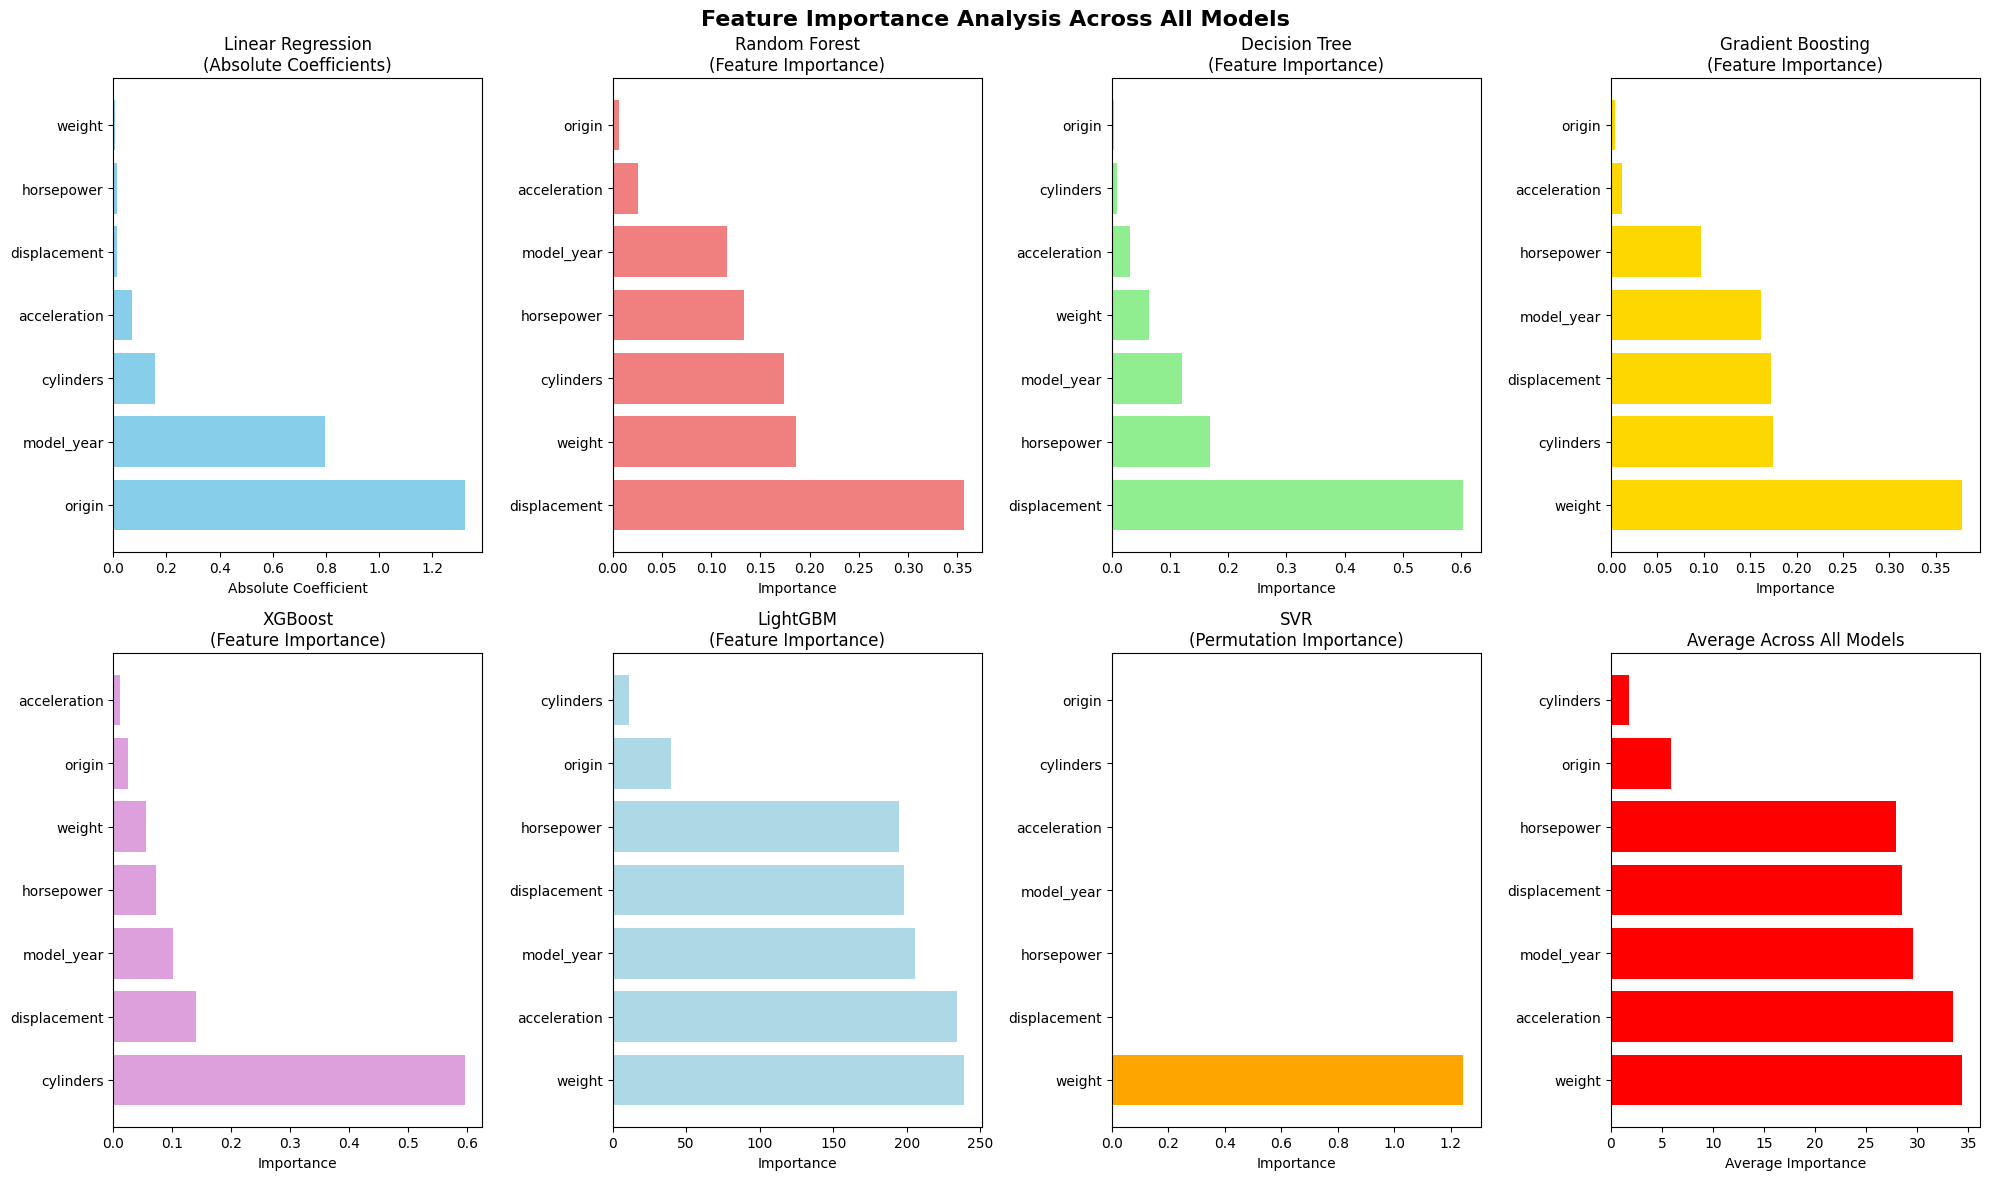


12. FEATURE IMPORTANCE HEATMAP:
-----------------------------------


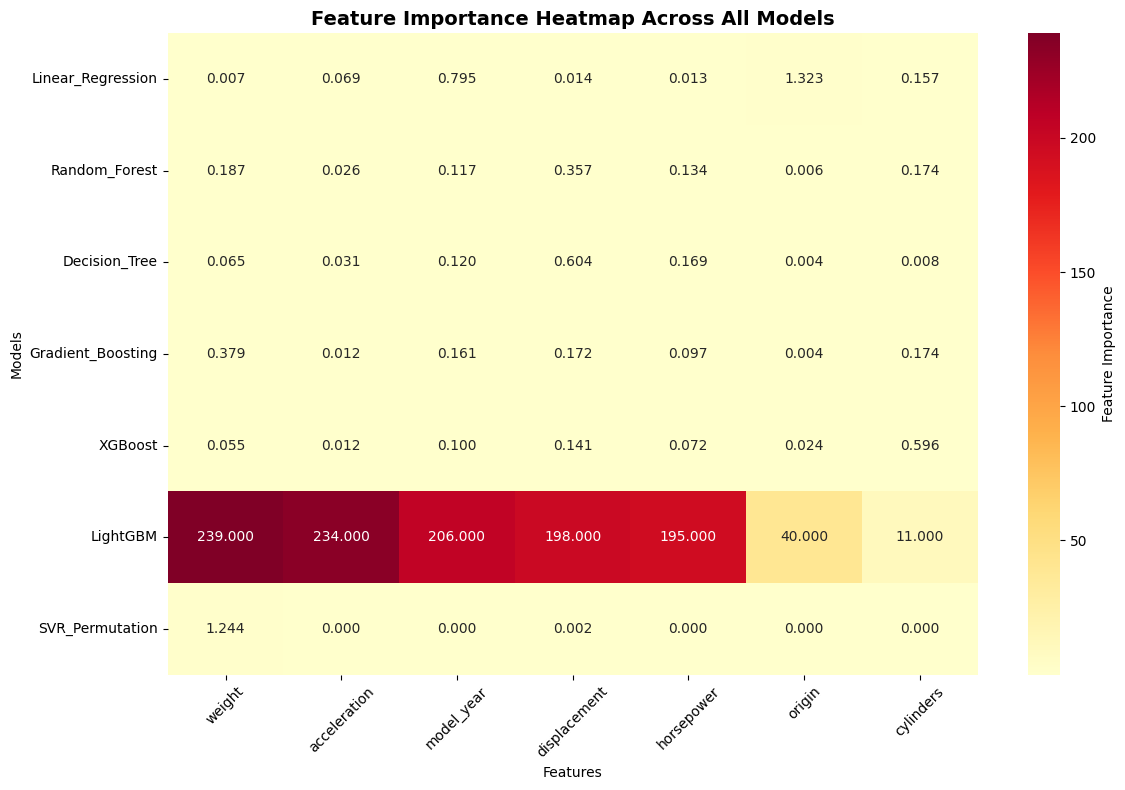


13. SUMMARY AND RECOMMENDATIONS:
-----------------------------------
MOST IMPORTANT FEATURES (Based on Average Importance):
  weight: 34.4194 ± 90.2126
  acceleration: 33.4499 ± 88.4343
  model_year: 29.6134 ± 77.7796

LEAST IMPORTANT FEATURES:
  horsepower: 27.9264 ± 73.6726
  origin: 5.9087 ± 15.0408
  cylinders: 1.7299 ± 4.0925


In [ ]:

# 11. Visualizations
print("\n11. FEATURE IMPORTANCE VISUALIZATIONS:")
print("-" * 40)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Feature Importance Analysis Across All Models', fontsize=16, fontweight='bold')

# Plot 1: Linear Regression
axes[0, 0].barh(lr_importance['Feature'], lr_importance['Abs_Coefficient'], color='skyblue')
axes[0, 0].set_title('Linear Regression\n(Absolute Coefficients)')
axes[0, 0].set_xlabel('Absolute Coefficient')

# Plot 2: Random Forest
axes[0, 1].barh(rf_importance['Feature'], rf_importance['Importance'], color='lightcoral')
axes[0, 1].set_title('Random Forest\n(Feature Importance)')
axes[0, 1].set_xlabel('Importance')

# Plot 3: Decision Tree
axes[0, 2].barh(dt_importance['Feature'], dt_importance['Importance'], color='lightgreen')
axes[0, 2].set_title('Decision Tree\n(Feature Importance)')
axes[0, 2].set_xlabel('Importance')

# Plot 4: Gradient Boosting
axes[0, 3].barh(gb_importance['Feature'], gb_importance['Importance'], color='gold')
axes[0, 3].set_title('Gradient Boosting\n(Feature Importance)')
axes[0, 3].set_xlabel('Importance')

# Plot 5: XGBoost
axes[1, 0].barh(xgb_importance['Feature'], xgb_importance['Importance'], color='plum')
axes[1, 0].set_title('XGBoost\n(Feature Importance)')
axes[1, 0].set_xlabel('Importance')

# Plot 6: LightGBM
axes[1, 1].barh(lgb_importance['Feature'], lgb_importance['Importance'], color='lightblue')
axes[1, 1].set_title('LightGBM\n(Feature Importance)')
axes[1, 1].set_xlabel('Importance')

# Plot 7: SVR Permutation
axes[1, 2].barh(svr_importance['Feature'], svr_importance['Importance'], color='orange')
axes[1, 2].set_title('SVR\n(Permutation Importance)')
axes[1, 2].set_xlabel('Importance')

# Plot 8: Average Importance
axes[1, 3].barh(all_importance['Feature'], all_importance['Average_Importance'], color='red')
axes[1, 3].set_title('Average Across All Models')
axes[1, 3].set_xlabel('Average Importance')

plt.tight_layout()
plt.show()

# 12. Heatmap of Feature Importance
print("\n12. FEATURE IMPORTANCE HEATMAP:")
print("-" * 35)

# Create heatmap data
heatmap_data = all_importance.set_index('Feature').drop(['Average_Importance', 'Std_Importance'], axis=1)
heatmap_data = heatmap_data.T

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Feature Importance'})
plt.title('Feature Importance Heatmap Across All Models', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Models')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 13. Summary and Recommendations
print("\n13. SUMMARY AND RECOMMENDATIONS:")
print("-" * 35)

print("MOST IMPORTANT FEATURES (Based on Average Importance):")
top_features = all_importance.head(3)
for idx, row in top_features.iterrows():
    print(f"  {row['Feature']}: {row['Average_Importance']:.4f} ± {row['Std_Importance']:.4f}")

print(f"LEAST IMPORTANT FEATURES:")
bottom_features = all_importance.tail(3)
for idx, row in bottom_features.iterrows():
    print(f"  {row['Feature']}: {row['Average_Importance']:.4f} ± {row['Std_Importance']:.4f}")